In [1]:
# Uninstall existing versions of gensim and numpy
!pip uninstall -y gensim numpy

# Reinstall gensim and numpy cleanly
!pip install --no-cache-dir gensim numpy

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 130.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 139.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 177.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 61.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import gensim.downloader as api

In [3]:
# File paths
json_path = '/content/drive/MyDrive/ALU/yelp_academic_dataset_review.json'
csv_path = '/content/drive/MyDrive/ALU/yelp_reviews_sample.csv'

# Read and save the first chunk (e.g. 100,000 rows)
chunk = pd.read_json(json_path, lines=True, chunksize=100000)
first_chunk = next(chunk)
first_chunk.to_csv(csv_path, index=False)


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
df = first_chunk

In [6]:
df.columns


Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [7]:
print(df.describe())
print(df.isnull().sum())

               stars         useful          funny           cool  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        3.842910       0.898980       0.257180       0.347030   
min         1.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         5.000000       1.000000       0.000000       0.000000   
max         5.000000     320.000000      98.000000      49.000000   
std         1.354729       2.205186       1.010212       1.066382   

                                date  
count                         100000  
mean   2015-05-02 14:36:08.625299968  
min              2005-03-01 17:47:15  
25%    2013-12-07 13:33:34.750000128  
50%       2015-09-26 23:21:59.500000  
75%    2017-04-08 12:26:05.249999872  
max              2018-10-04 18:22:35  
std                              NaN  
review_id      0
user_id   

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

In [10]:
df.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,clean_text
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,if you decide to eat here just be aware it is ...


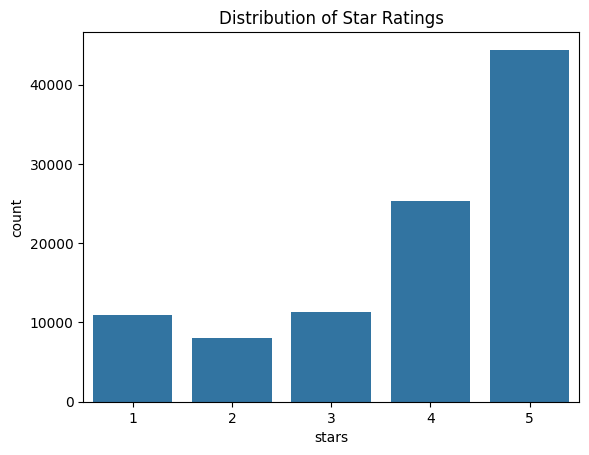

In [11]:
sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings')
plt.show()

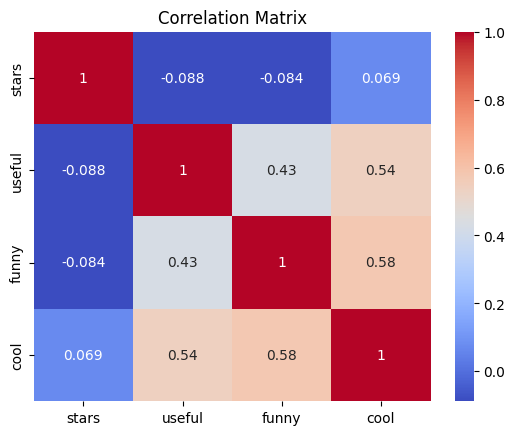

In [12]:
# Correlation matrix
correlation = df[['stars', 'useful', 'funny', 'cool']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

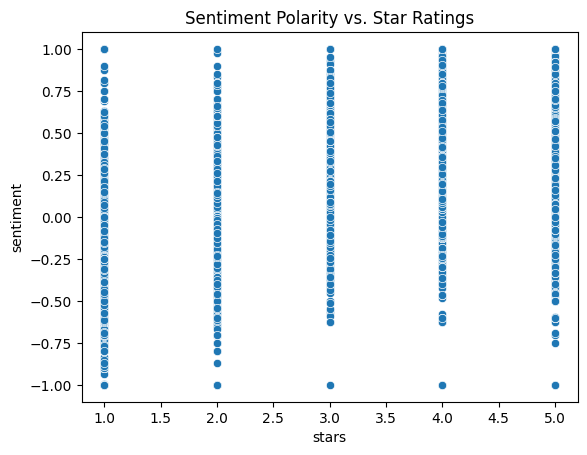

In [13]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment vs. stars
sns.scatterplot(x='stars', y='sentiment', data=df)
plt.title('Sentiment Polarity vs. Star Ratings')
plt.show()

In [14]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['tokens'] = df['text'].apply(preprocess_text)

In [15]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,clean_text,sentiment,tokens
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,if you decide to eat here just be aware it is ...,0.085278,"[decide, eat, aware, going, take, hours, begin..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,ive taken a lot of spin classes over the years...,0.402273,"[ive, taken, lot, spin, classes, years, nothin..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,family diner had the buffet eclectic assortmen...,0.139935,"[family, diner, buffet, eclectic, assortment, ..."
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,wow yummy different delicious our favorite...,0.302557,"[wow, yummy, different, delicious, favorite, l..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,cute interior and owner gave us tour of upcom...,0.400969,"[cute, interior, owner, gave, us, tour, upcomi..."


In [16]:

word2vec_model = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [19]:
import numpy as np
def get_review_embedding(tokens, model, embedding_dim=300):
    valid_embeddings = [model[word] for word in tokens if word in model]
    if len(valid_embeddings) == 0:
        return np.zeros(embedding_dim)
    return np.mean(valid_embeddings, axis=0)

# Compute embeddings for each review
df['embedding'] = df['tokens'].apply(lambda tokens: get_review_embedding(tokens, word2vec_model))

In [20]:
X = np.array(list(df['embedding']))
y = df['sentiment'].values


In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')



Training data shape: (80000, 300)
Testing data shape: (20000, 300)


In [22]:
zero_vectors = np.sum(np.all(X == 0, axis=1))
print(f'Number of reviews with zero vectors: {zero_vectors}')

Number of reviews with zero vectors: 4


In [25]:
X[:5]  # shows the first 5 rows of the array


array([[ 0.01518888,  0.08333712, -0.02304539, ..., -0.04966736,
         0.03500242, -0.00685439],
       [ 0.01511211,  0.0466938 ,  0.03341856, ..., -0.04184151,
        -0.03800297, -0.01502419],
       [-0.0431368 ,  0.04014206, -0.02630374, ..., -0.03028508,
         0.04084251,  0.01507408],
       [-0.03222102,  0.04182573,  0.05274686, ..., -0.05110862,
         0.03474981,  0.05480957],
       [-0.03720373,  0.07330322, -0.01562093, ..., -0.03913218,
         0.04599418, -0.01769034]])